<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>



# 모델 선택을 위한 어떤 평가지표를 사용해야 할까?

# Accuracy(정확도)

정확도는 가장 기본적인 평가지표이지만, 단지 정확도가 높은 것이 좋은 모델임을 말하지는 않는다. 

## 정확도의 맹점 예시 : Titanic

In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # 아무것도 하급하지 않는 모델을 생성
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros( (X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1 :
                pred[i]=0
            else:
                pred[i]=1
        
        return pred
    

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name', 'Ticket'],axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Data Preprocessing 통합 합수
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

url='https://raw.githubusercontent.com/SeWonKwon/Data_Collection/main/Dataset/titanic_train.csv'

# load 및 전처리, 분할
titanic_df = pd.read_csv(url)
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))


Dummy Classifier의 정확도는 : 0.7877


단지 여성이냐 남성이냐의 정확도가 무려 0.78이다.

## 정확도의 예시 : creditcard 데이타

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 
    def predict(self,X):
        return np.zeros((len(X),1), dtype=np.int64)
    

In [5]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

print(raw_df.shape)

(284807, 31)


In [6]:
y_df = raw_df['Class']
X_df = raw_df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=123)

fakemodel= MyFakeClassifier()
fakemodel.fit(X_train, y_train)
fakepredcition = fakemodel.predict(X_test)

In [7]:
print('Fake Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, fakepredcition)))

Fake Classifier의 정확도는 : 0.9980


정답 레이블의 불균형한 자료는 이렇듯 0.998이라는 엄청난 정확도를 가지게 된다. 

## 정밀도와 재현율

* 정pre예PoPo
* 재Re실PoPo

* 정밀도(Precision) 
     - = TP / (FP + TP) :  예측 값 `Positive, 1` 중 `Positive` 인 비율   
     
     
     

* 재현율(Recall)  , 민감도(Sensitivity), TPR(True Positive Rate)
    - = TP / (FN + TP) : 실재 값 `Positive` 중에 `Positive, 1`으로 예측한 비율

* 재현율이 상대적으로 중요한 지표인 경우:
    - 실재 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업부상 큰 영향이 발생하는 경우
    - FN이 절대적으로 적어야 한다. 
    - 암환자 판별, 금융거래 사기
    
* 정밀도가 상대적으로 더 중요한 지표인 경우:
    - 실재 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    - FP가 절대적으로 적어야 한다. 
    - 스팸메일 여부 판단

confsion_matrix를 통해서 신용카드 결과를 시각해 보면,

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepredcition)

array([[56847,     0],
       [  115,     0]], dtype=int64)

위에서의 신용카드 자료에서의 정밀도와 재현율을 구해보도록하자.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("정밀도(Precision) :", precision_score(y_test, fakepredcition))
print("재현율(Recall) :", recall_score(y_test, fakepredcition))

정밀도(Precision) : 0.0
재현율(Recall) : 0.0


C:\Users\bigne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


둘다..0.0//0.0 임을 볼수 있다. 

* 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수를 생성해 보자

In [10]:
def get_clf_eval(y_test, pred):
    conf_mat = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion_Matrix')
    print(conf_mat)
    print()
    print("정확도 : {:.4f}".format(acc), "정밀도:  {:.4f}".format(pre), "재현율  {:.4f}".format(recall ))

In [11]:
url='https://raw.githubusercontent.com/SeWonKwon/Data_Collection/main/Dataset/titanic_train.csv'

# load 및 전처리, 분할
titanic_df = pd.read_csv(url)
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.2, random_state=11)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier')
get_clf_eval(y_test, mypredictions)


Dummy Classifier
Confusion_Matrix
[[103  15]
 [ 15  46]]

정확도 : 0.8324 정밀도:  0.7541 재현율  0.7541


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LR_pred = model.predict(X_test)
print('LogisticRegression')
get_clf_eval(y_test,LR_pred)

LogisticRegression
Confusion_Matrix
[[104  14]
 [ 13  48]]

정확도 : 0.8492 정밀도:  0.7742 재현율  0.7869


C:\Users\bigne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 정밀도&재현율 트레이드 오프 관계에 대한 이해


* Threshold 를 조절하면 정밀도와 재현율이 달라진다. 

* Threshold 낮추면 정밀도는 내려가고, 재현율은 올라간다.

* 목적에 맞게 Threshold 조정으로 맞는 모델을 최종 선택한다. 

### `predict_proba()`와 `Binarizer()`를 통한 `threshold` 조정

In [15]:
pred_proba = model.predict_proba(X_test)

print('pred_proba()의 결과 shape {}'.format(pred_proba.shape))
print('')
print('pred_proba()의결과')
print(pred_proba[:3])
print('')
print('predict의 결과')
print(LR_pred[:3])

pred_proba()의 결과 shape (179, 2)

pred_proba()의결과
[[0.46197701 0.53802299]
 [0.87868649 0.12131351]
 [0.87716331 0.12283669]]

predict의 결과
[1 0 0]


'pred_proba'의 결과 중 더 높은 곳으로 'predict'가 예측 되는 구조이다. 

`Binarizer` 활용 사용법

In [16]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 를 조정해서 값을 조정

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


'predict_proba' 와 'Binarizer'을 이용해서 예측 값을 바꾸어 보겠습니다.

In [41]:
from sklearn.preprocessing import Binarizer

# Binarizer 의 threshold 설정값 . 분류 결정 임곗값임.
custom_threshold = 0.5

'''predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 
Binarizer를 적용하여 threshold 값의 변화에 따른 예측값 변화'''

pred_proba_1 = pred_proba[:,1].reshape([-1,1])

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test=y_test, pred=custom_predict)

Confusion_Matrix
[[104  14]
 [ 13  48]]

정확도 : 0.8492 정밀도:  0.7742 재현율  0.7869


In [22]:
custom_threshold = 0.4

'''predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 
Binarizer를 적용하여 threshold 값의 변화에 따른 예측값 변화'''

pred_proba_1 = pred_proba[:,1].reshape([-1,1])

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test=y_test, pred=custom_predict)

Confusion_Matrix
[[98 20]
 [10 51]]

정확도 : 0.8324 정밀도:  0.7183 재현율  0.8361


임계값을 낮추었더니 재현율은 올라가고, 정밀도는 내려간 것을 볼수 있다. 

In [27]:
def get_clf_eval2(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    return acc, pre, recall

In [45]:
thresholds_list = np.arange(0.1,1,0.05).tolist()

pred_proba_1 = pred_proba[:, 1].reshape([-1, 1])
result_df = pd.DataFrame(columns=['임곗값', '정확도', '정밀도', '재현율'])
idx = 0 

for threshold in thresholds_list:
    pred_proba_1 = pred_proba[:, 1].reshape([-1, 1])
    binarizer = Binarizer(threshold=threshold).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    acc, pre, recall = get_clf_eval2(y_test=y_test, pred=custom_predict)
    result_df.loc[idx,:] = (threshold, acc, pre, recall)
    
    idx += 1
    
result_df

,임곗값,정확도,정밀도,재현율
0,0.1,0.441341,0.378882,1
1,0.15,0.670391,0.509259,0.901639
2,0.2,0.726257,0.561224,0.901639
3,0.25,0.776536,0.617978,0.901639
4,0.3,0.804469,0.654762,0.901639
5,0.35,0.821229,0.688312,0.868852
6,0.4,0.832402,0.71831,0.836066
7,0.45,0.849162,0.765625,0.803279
8,0.5,0.849162,0.774194,0.786885
9,0.55,0.865922,0.836364,0.754098


임계값에 따른 confusion_matrix 한번 그려봐~~

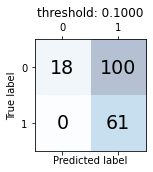

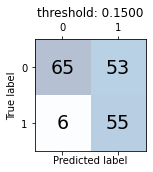

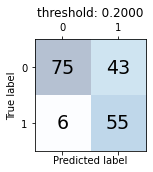

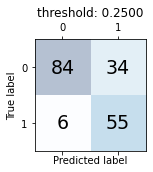

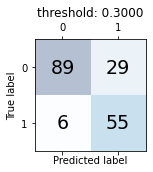

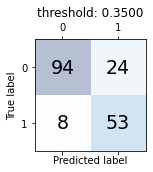

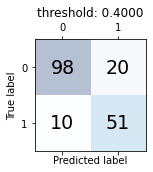

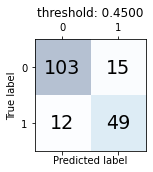

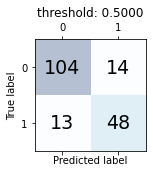

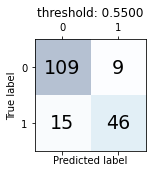

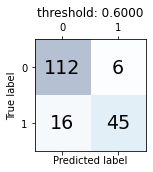

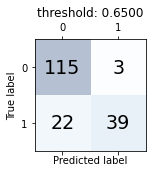

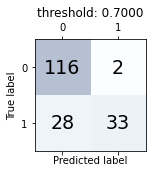

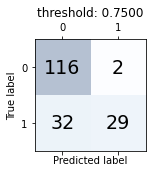

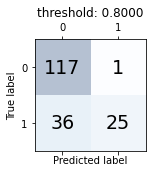

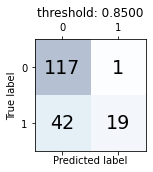

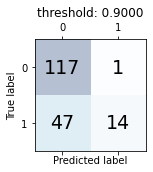

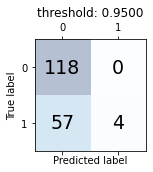

In [49]:
import matplotlib.pyplot as plt
for threshold in thresholds_list:
    pred_proba_1 = pred_proba[:, 1].reshape([-1, 1])
    binarizer = Binarizer(threshold=threshold).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    conf_mat = confusion_matrix(y_true=y_test, y_pred=custom_predict)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center', fontsize=19 )
    plt.title('threshold: {:.4f}'.format(threshold))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

### 정밀도와 재현율의 맹점

* 정밀도가 100%가 되는방법

* 정밀도가 100%가 되는 방법

In [53]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = model.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)
thresholds 5 sample: [0.10390279 0.10390503 0.10393018 0.1078841  0.10887762]
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


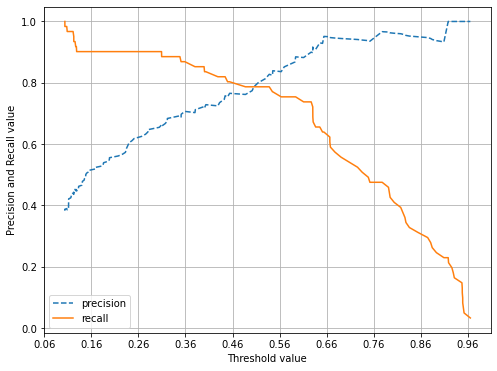

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, model.predict_proba(X_test)[:, 1] )

##  F-1 Score 그래서 나왔다!!

In [59]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, LR_pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [61]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [62]:
def get_clf_eval_by_threshold(y_true, pred_proba, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(pred_proba)
        pred = binarizer.transform(pred_proba)
        print('임곗값', threshold)
        get_clf_eval(y_true, pred)
    

In [66]:


thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60, 0.65]
pred_proba = model.predict_proba(X_test)
get_clf_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727
임곗값 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036
임곗값 0.65
오차 행렬
[[115   3]
 [ 22  39]]
정확도: 0.8603, 정밀도: 0.9286, 재현율: 0.6393, F1:0.7573


## ROC 곡선과 AUC 곡선

In [69]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = model.predict_proba(X_test)[:, 1] 
print('max predict_proba:', np.max(pred_proba_class1))

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
print('thresholds[0]:', thresholds[0])
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

max predict_proba: 0.9650933752259748
thresholds[0]: 1.9650933752259747
샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임곗값별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


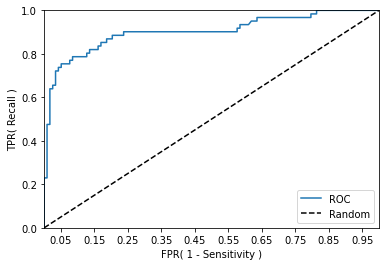

In [70]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, model.predict_proba(X_test)[:, 1] )


# 출처:

* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>



* [이수안컴퓨터연구소](https://www.youtube.com/c/%EC%9D%B4%EC%88%98%EC%95%88%EC%BB%B4%ED%93%A8%ED%84%B0%EC%97%B0%EA%B5%AC%EC%86%8C)

* [파이썬 머신러닝 완변가이드, 권철민](https://book.naver.com/bookdb/book_detail.nhn?bid=16238302)
